In [32]:
import pandas as pd
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt
import contextily as cx

In [42]:
data = pd.read_csv('./aisdk-2026-02-05.csv')

In [43]:
data = data[data['Type of mobile'] == 'Class A']

In [44]:
data = data[data['MMSI'].isin(data[data['ROT'].between(0, 360)]['MMSI'])]

In [46]:
data.info()

<class 'pandas.DataFrame'>
Index: 12465868 entries, 0 to 15750589
Data columns (total 26 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   # Timestamp                     str    
 1   Type of mobile                  str    
 2   MMSI                            int64  
 3   Latitude                        float64
 4   Longitude                       float64
 5   Navigational status             str    
 6   ROT                             float64
 7   SOG                             float64
 8   COG                             float64
 9   Heading                         float64
 10  IMO                             str    
 11  Callsign                        str    
 12  Name                            str    
 13  Ship type                       str    
 14  Cargo type                      str    
 15  Width                           float64
 16  Length                          float64
 17  Type of position fixing device  str    
 

In [47]:
data.head()

,# Timestamp,Type of mobile,MMSI,Latitude,Longitude,Navigational status,ROT,SOG,COG,Heading,...,Length,Type of position fixing device,Draught,Destination,ETA,Data source type,A,B,C,D
0,05/02/2026 00:00:00,Class A,620999953,56.134920,11.210810,Under way using engine,0.0,12.5,41.4,43.0,...,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
2,05/02/2026 00:00:00,Class A,220634000,54.727067,10.777630,Under way using engine,0.0,10.9,185.9,185.0,...,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
3,05/02/2026 00:00:00,Class A,220634000,54.727067,10.777630,Under way using engine,0.0,10.9,185.9,185.0,...,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
4,05/02/2026 00:00:00,Class A,620999953,56.134920,11.210810,Under way using engine,0.0,12.5,41.4,43.0,...,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN
5,05/02/2026 00:00:00,Class A,305371000,54.858667,12.560833,Under way using engine,NaN,8.6,214.0,208.0,...,NaN,Undefined,NaN,Unknown,NaN,AIS,NaN,NaN,NaN,NaN


In [48]:
data.SOG.describe()

count    1.245176e+07
mean     5.902253e+00
std      6.472431e+00
min      0.000000e+00
25%      0.000000e+00
50%      4.600000e+00
75%      1.060000e+01
max      1.022000e+02
Name: SOG, dtype: float64

<Axes: xlabel='SOG', ylabel='Count'>

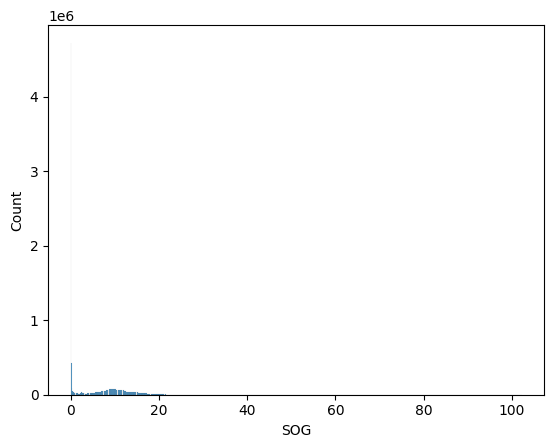

In [49]:
sns.histplot(data=data.SOG)

<Axes: xlabel='ROT', ylabel='Count'>

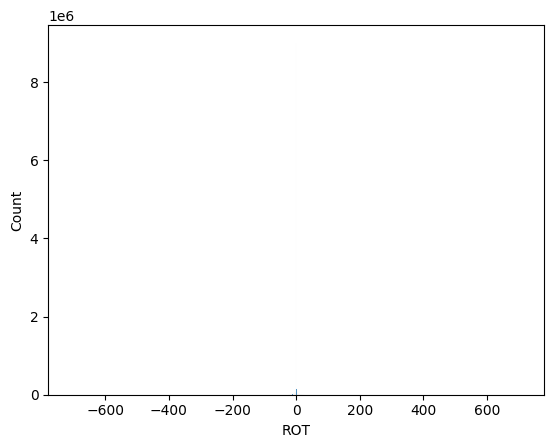

In [50]:
sns.histplot(data=data.ROT)

<Axes: xlabel='COG', ylabel='Count'>

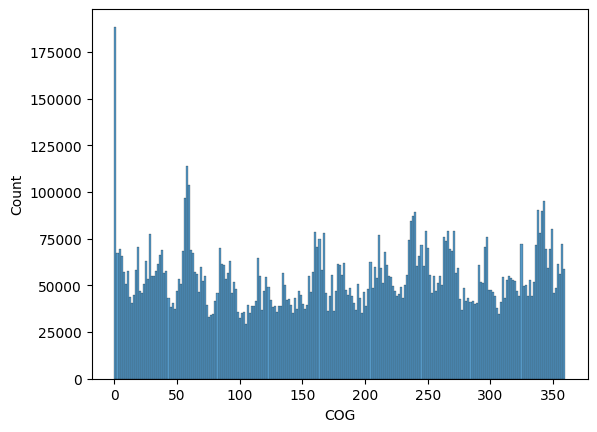

In [51]:
sns.histplot(data=data.COG)

In [22]:
gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude), crs="EPSG:4326"
)

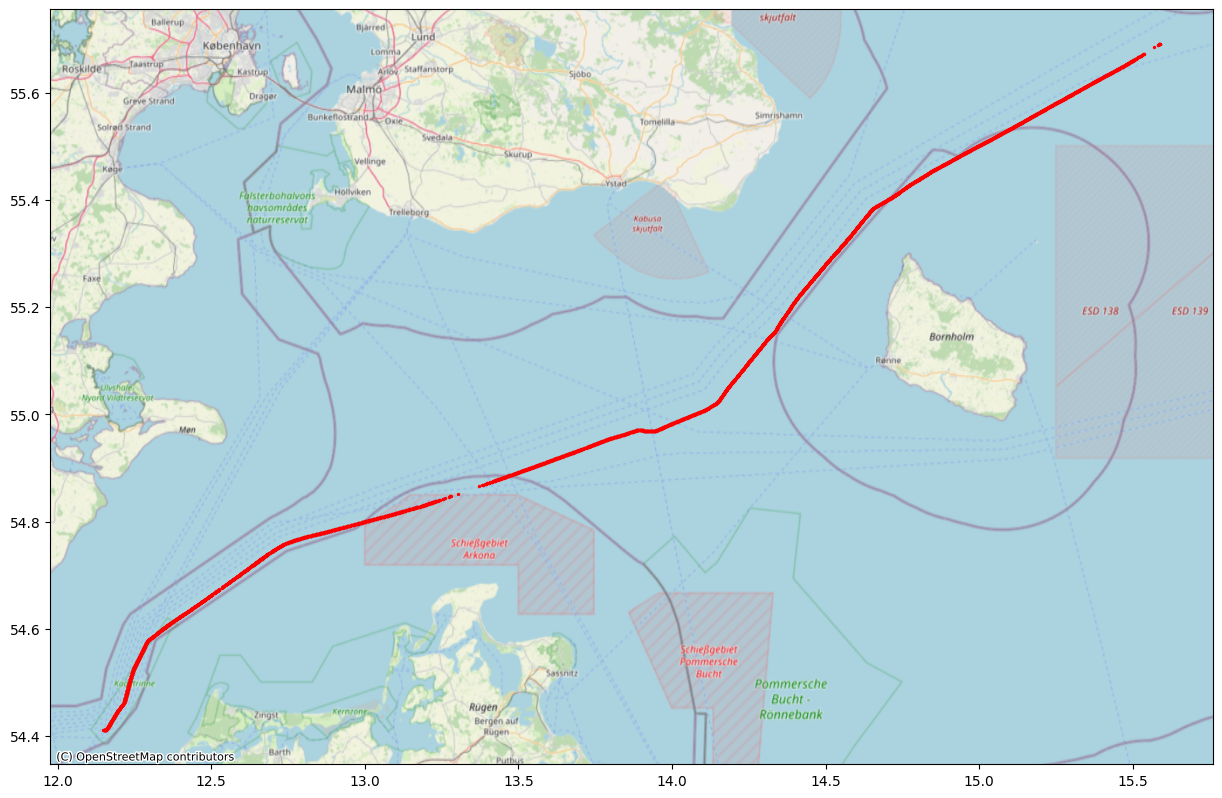

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

gdf[gdf.MMSI == 538007403].plot(ax=ax, markersize=2, color='red')

cx.add_basemap(ax, crs=gdf.crs, source=cx.providers.OpenStreetMap.Mapnik, zoom=9)